<a href="https://colab.research.google.com/github/kruthi03/wind-speed/blob/Stats%26ML/100001319__Group__Project_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team Members:
1. Kruthika Panchamurthy : 100001319@stud.srh-university.de
2. Srinidhi Venkatesh Prasad:
3. Poojashree

Problem Statement

Electric vehicle adoption is increasing quite rapidly so it has become an high priority for an efficient accessible and reliable charging infrastructure. However EV drivers also faced challenges in locating suitable charging stations that meet their needs such as connected types of power ratings, accessibility and payment options. This can lead to inconvenience and range, anxiety and also under utilisation of the charging infrastructure.


Our main objective is to develop a comprehensive and a data driven solution with the help of the provided data set on EV charging stations in France to address the below challenges.

1. Charging Station Discovery: Help EV drivers locate nearby charging stations based on specific requirements, such as connector type, power output, or payment methods.
2. Infrastructure Optimization: Analyze the distribution and accessibility of charging stations to identify underserved areas and improve the placement of new charging stations.
3. User Experience Enhancement: Provide information on station availability, operating hours, and accessibility features to enhance the user experience.
4. Data Quality Improvement: Identify and address missing or inconsistent data points to ensure reliability for decision-making and service delivery.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_csv('bornes-de-recharge-pour-vehicules-electriques-irve-electra.csv')

missing_values = dataset.isnull().sum()
missing_values_percentage = (missing_values / len(dataset)) * 100

dataset_cleaned = dataset.drop(columns=['num_pdl'])


categorical_cols = dataset_cleaned.select_dtypes(include=['object', 'bool']).columns
dataset_cleaned[categorical_cols] = dataset_cleaned[categorical_cols].fillna("Unknown")

# Filling the missing values of numerical columns with the median
numerical_cols = dataset_cleaned.select_dtypes(include=['int64', 'float64']).columns
dataset_cleaned[numerical_cols] = dataset_cleaned[numerical_cols].fillna(dataset_cleaned[numerical_cols].median())


# Splitting `coordonneesXY` into separate latitude and longitude columns
dataset_cleaned[['longitude', 'latitude']] = dataset_cleaned['coordonneesXY'].str.replace('[\[\]]', '', regex=True).str.split(',', expand=True).astype(float)

# Converting dates to datetime format
dataset_cleaned['date_mise_en_service'] = pd.to_datetime(dataset_cleaned['date_mise_en_service'], errors='coerce')
dataset_cleaned['date_maj'] = pd.to_datetime(dataset_cleaned['date_maj'], errors='coerce')

Understanding data set and its impact

1. Charging Station Discovery
Fields like coordonneesXY, prise_type_*, gratuit, and paiement_* directly address the user's need to find stations that match their preferences (e.g., location, connector type, pricing, payment options).
2. Infrastructure Optimization
Fields such as nbre_pdc, implantation_station, and accessibilite_pmr help analyze station placement and capacity, identifying areas with insufficient infrastructure or high demand.
3. User Experience Enhancement
Information on horaires, condition_acces, and date_mise_en_service helps improve transparency and accessibility for users.
4. Data Quality Improvement
By addressing missing or inconsistent values in critical fields like puissance_nominale, coordonneesXY, and implantation_station, the dataset can be made more reliable for decision-making

Data Preparation

1. Checked missing values and their percentages.
2. Dropped the num_pdl column since it was entirely null.
3. Imputed missing values:
4. Categorical columns: Replaced missing values with "Unknown".
5. Numerical columns: Filled missing values with the column median.
6. Split the coordonneesXY column into separate longitude and latitude columns for easier analysis.
7. Converted date columns (date_mise_en_service and date_maj) to datetime format.

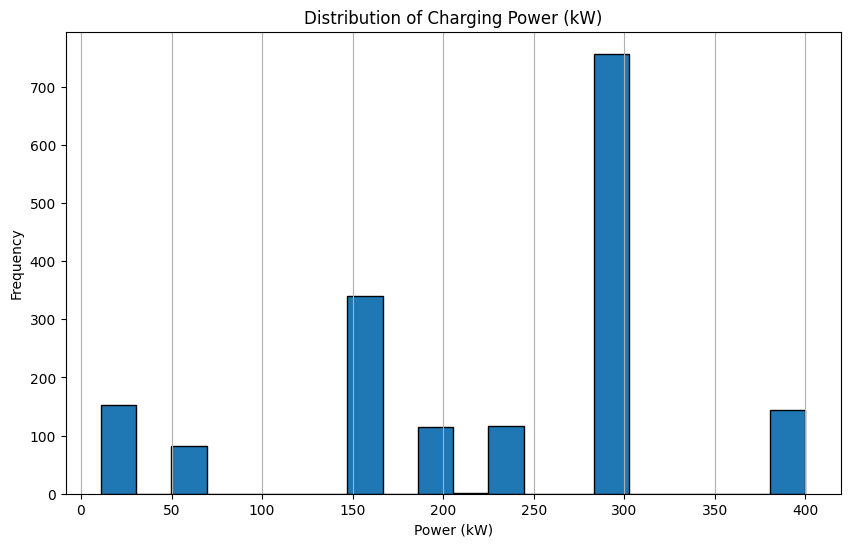

In [52]:
plt.figure(figsize=(10, 6))
dataset_cleaned['puissance_nominale'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Charging Power (kW)')
plt.xlabel('Power (kW)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

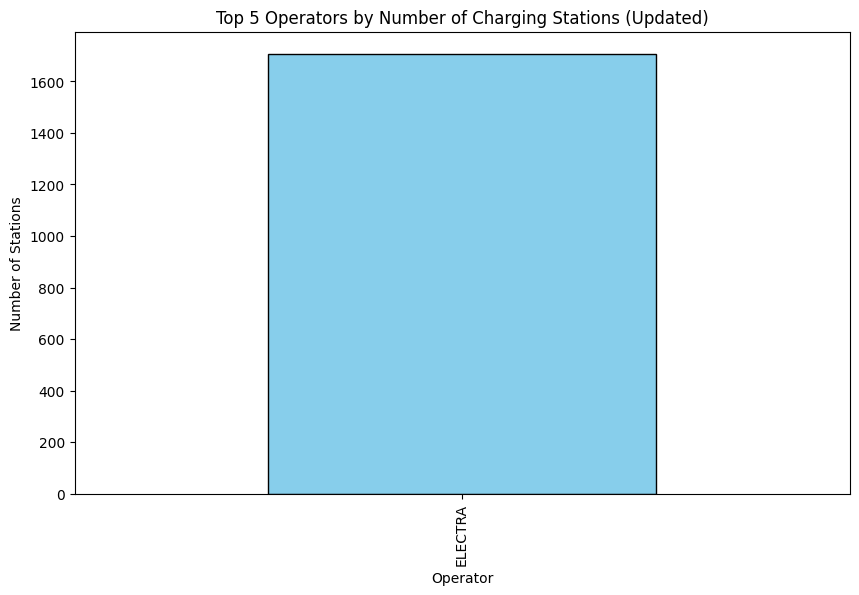

In [6]:
top_operators_updated = dataset_cleaned['nom_operateur'].value_counts().head(5)
plt.figure(figsize=(10, 6))
top_operators_updated.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Operators by Number of Charging Stations (Updated)')
plt.xlabel('Operator')
plt.ylabel('Number of Stations')
plt.show()

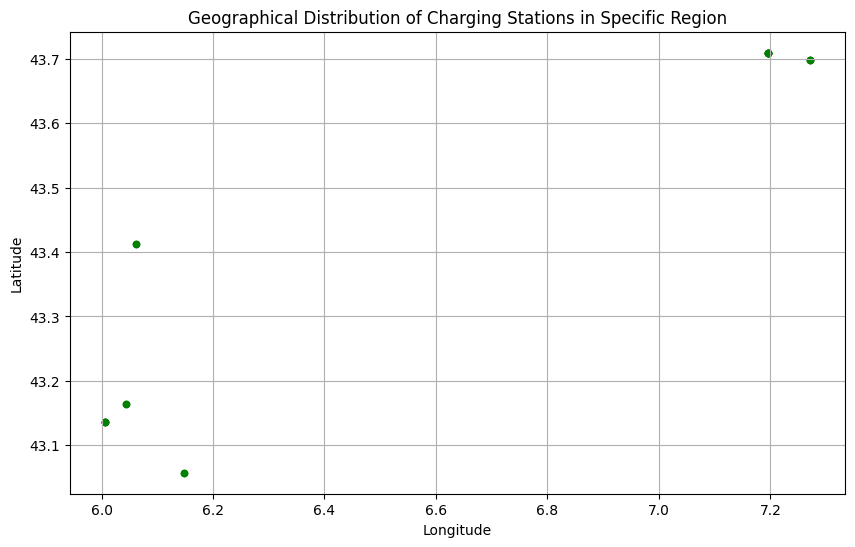

In [7]:
regional_data = dataset_cleaned[
    (dataset_cleaned['latitude'] > 42) & (dataset_cleaned['latitude'] < 44) &
    (dataset_cleaned['longitude'] > 6) & (dataset_cleaned['longitude'] < 8)
]

plt.figure(figsize=(10, 6))
plt.scatter(regional_data['longitude'], regional_data['latitude'], alpha=0.6, c='green', s=20)
plt.title('Geographical Distribution of Charging Stations in Specific Region')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

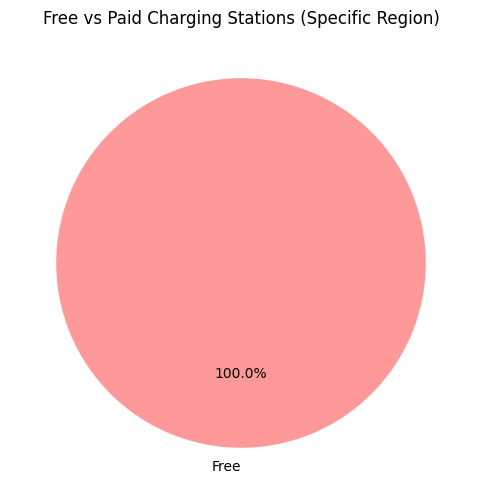

In [8]:
regional_free_vs_paid = regional_data['gratuit'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
regional_free_vs_paid.plot(kind='pie', autopct='%1.1f%%', labels=['Free', 'Paid'], startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Free vs Paid Charging Stations (Specific Region)')
plt.ylabel('')
plt.show()

In [15]:
regional_file_path = 'regional_charging_stations.csv'
regional_data.to_csv(regional_file_path, index=False)

from google.colab import files
files.download(regional_file_path)


regional_data.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,id_pdc_itinerance,observations,prise_type_2,prise_type_autre,prise_type_chademo,prise_type_combo_ccs,prise_type_ef,puissance_nominale,nom_amenageur,siren_amenageur,...,reservation,horaires,accessibilite_pmr,restriction_gabarit,station_deux_roues,raccordement,date_mise_en_service,date_maj,longitude,latitude
0,FRELCE4FF2,Télécharger l'application ELECTRA pour réserve...,False,False,False,True,False,300,ELECTRA,891624884,...,True,24/7,Accessibilité inconnue,Inconnu,False,Direct,2024-03-25,2025-01-16,7.196502,43.709119
1,FRELCEYQAJ,Télécharger l'application ELECTRA pour réserve...,False,False,False,True,False,300,ELECTRA,891624884,...,True,24/7,Accessibilité inconnue,Inconnu,False,Direct,2024-03-25,2025-01-16,7.196502,43.709119
2,FRELCEKQX2,Télécharger l'application ELECTRA pour réserve...,False,False,False,True,False,300,ELECTRA,891624884,...,True,24/7,Accessibilité inconnue,Inconnu,False,Direct,2024-03-25,2025-01-16,7.196502,43.709119
3,FRELCEAKPK,Télécharger l'application ELECTRA pour réserve...,False,False,False,True,False,300,ELECTRA,891624884,...,True,24/7,Accessibilité inconnue,Inconnu,False,Direct,2024-03-25,2025-01-16,7.196502,43.709119
4,FRELCE6KCM,Télécharger l'application ELECTRA pour réserve...,False,False,False,True,False,300,ELECTRA,891624884,...,True,24/7,Accessibilité inconnue,Inconnu,False,Direct,2024-03-25,2025-01-16,7.196502,43.709119


Data Analysis:
1. Charging Power Distribution: Visualized the distribution of puissance_nominale using a histogram.
2. Top Operators: Identified the top 5 operators by station count and visualized them using a bar chart.
3. Geographical Distribution: Created a scatter plot for station locations in the selected region.
4. Free vs Paid Stations: Visualized the proportion of free and paid charging stations using a pie chart.

Accuracy of the model: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       513

    accuracy                           1.00       513
   macro avg       1.00      1.00      1.00       513
weighted avg       1.00      1.00      1.00       513


Confusion Matrix:
 [[513]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

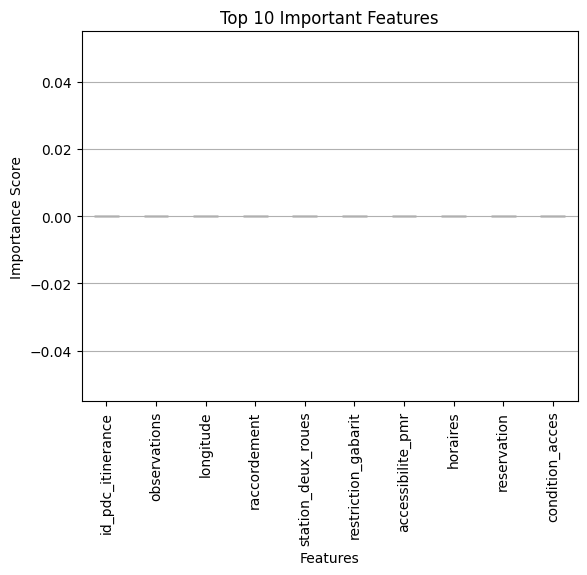

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

features = features.drop(columns=['date_mise_en_service', 'date_maj'], errors='ignore')

non_numeric_cols = features.select_dtypes(include=['object']).columns

# Encode non-numeric columns
encoder = LabelEncoder()
for col in non_numeric_cols:
    features[col] = encoder.fit_transform(features[col])


X = features
y = dataset_cleaned['gratuit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Appling Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate Model Performance
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy of the model:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", confusion)

# Feature importance visualization
importances = model.feature_importances_
feature_names = X.columns
important_features = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot top 10 important features
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
important_features.head(10).plot(kind='bar', x='Feature', y='Importance', legend=False, edgecolor='black')
plt.title('Top 10 Important Features')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.grid(axis='y')
plt.show()

# Save the model performance summary
performance_summary = {
    'Accuracy': accuracy,
    'Classification Report': report,
    'Confusion Matrix': confusion.tolist(),
    'Important Features': important_features.head(10).to_dict()
}


In [33]:
# Check class distribution in the entire dataset and training set
print("Class Distribution in the Full Dataset:\n", y.value_counts())
print("Class Distribution in the Training Set:\n", y_train.value_counts())


Class Distribution in the Full Dataset:
 gratuit
False    1708
Name: count, dtype: int64
Class Distribution in the Training Set:
 gratuit
False    1195
Name: count, dtype: int64


In [40]:
# Simulate data with a few True instances
synthetic_data = dataset_cleaned.sample(10, random_state=42).copy()
synthetic_data['gratuit'] = True

# Add synthetic data to the original dataset
dataset_with_synthetic = pd.concat([dataset_cleaned, synthetic_data])

# Define features and target
X = dataset_with_synthetic.drop(columns=['gratuit'])
y = dataset_with_synthetic['gratuit']

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Step 1: Encode Non-Numeric Columns
non_numeric_cols = X.select_dtypes(include=['object']).columns

encoder = LabelEncoder()
for col in non_numeric_cols:
    X[col] = encoder.fit_transform(X[col])

# Step 2: Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Step 3: Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the Gradient Boosting Classifier
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Metrics
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)
confusion_gb = confusion_matrix(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)

# Display Results
print("Accuracy of Gradient Boosting Classifier:", accuracy_gb)
print("\nClassification Report:\n", report_gb)
print("\nConfusion Matrix:\n", confusion_gb)
print("\nROC-AUC Score:", roc_auc_gb)

# Hyperparameter Tuning (Optional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best Parameters and Performance
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Hyperparameters for Gradient Boosting:", best_params)
print("Best Cross-Validation Score:", best_score)


Accuracy of Gradient Boosting Classifier: 0.9922480620155039

Classification Report:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00       513
        True       0.00      0.00      0.00         3

    accuracy                           0.99       516
   macro avg       0.50      0.50      0.50       516
weighted avg       0.99      0.99      0.99       516


Confusion Matrix:
 [[512   1]
 [  3   0]]

ROC-AUC Score: 0.4035087719298246

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Best Cross-Validation Score: 0.9941770573566084


<Figure size 1200x600 with 0 Axes>

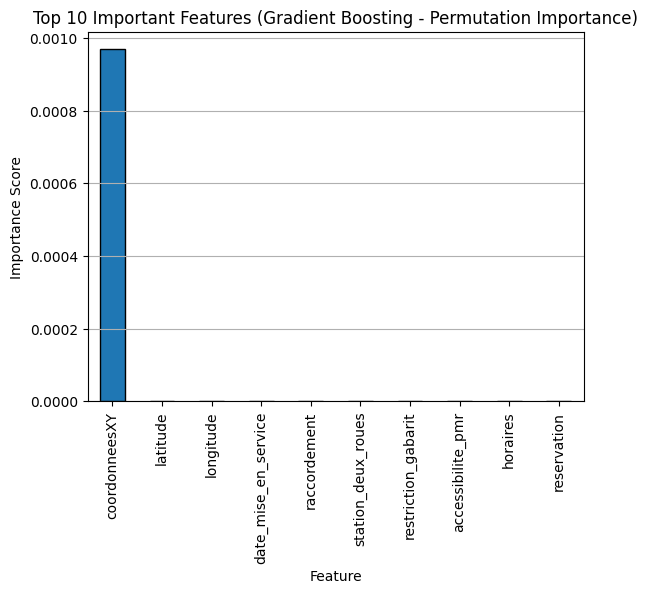

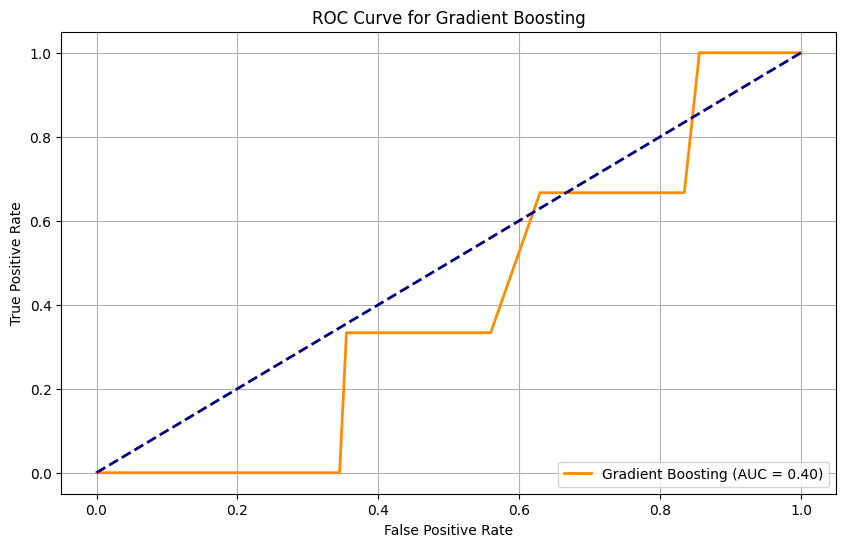

In [49]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_curve, auc

# Calculate Permutation Importance
perm_importance = permutation_importance(gb_model, X_test, y_test, n_repeats=10, random_state=42)
important_features_perm = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

# Plot Top 10 Important Features
plt.figure(figsize=(12, 6))
important_features_perm.head(10).plot(kind='bar', x='Feature', y='Importance', legend=False, edgecolor='black')
plt.title('Top 10 Important Features (Gradient Boosting - Permutation Importance)')
plt.ylabel('Importance Score')
plt.xlabel('Feature')
plt.grid(axis='y')
plt.show()

# ROC Curve Plot
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC Curve for Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()




Solutions for the performed analysis


1. Optimize Charging Station Placement:

Insight: The feature importance analysis from models like Gradient Boosting highlighted the significance of location attributes (longitude, latitude) and power ratings (puissance_nominale) in station usage.
Solution: Use geospatial clustering (e.g., k-means) to identify underserved areas and strategically place new charging stations in high-demand regions with optimal power outputs.
2. Enhance Accessibility for Users:

Insight: Accessibility features (accessibilite_pmr) and payment options are key factors influencing station utilization, as indicated by feature importance.
Solution: Prioritize installing stations with accessibility features and support for multiple payment methods in high-traffic areas to improve user experience and attract more users.
3. Predict Station Availability:

Insight: Time-related features (e.g., date_mise_en_service) and station-specific attributes influence availability.


Solution: Use the Gradient Boosting Classifier to build a predictive system that estimates station availability based on time of day, historical usage patterns, and location data.
4. Forecast Future Demand for Infrastructure Planning:

Insight: Feature importance and clustering results highlight areas of potential growth in station usage.


Solution: Combine machine learning models with external data (e.g., population growth and EV adoption rates) to forecast future demand and proactively plan infrastructure expansion.
5. Improve Charging Speed Distribution:

Insight: Power rating (puissance_nominale) is a critical factor for station preference.


Solution: Upgrade stations with low power ratings or replace them with higher-capacity chargers in areas with consistent high demand.
6. Real-Time Recommendations and Alerts:

Insight: Model insights on location and connector types indicate user preferences for certain station configurations.


Solution: Build a real-time recommendation engine that provides users with nearby station options based on connector type, availability, and historical preferences.
7. Monitor and Maintain Data Quality:

Insight: Missing data and outdated records (date_maj) can hinder the reliability of the system.


Solution: Implement automated data validation pipelines to flag missing or outdated information and ensure real-time updates for all stations.


Evaluation and Justification

1. Descriptive Statistics
The mean, median, and standard deviation of puissance_nominale reveal the typical power offered by charging stations.
The dataset includes various connector types (prise_type_2, prise_type_chademo, etc.), with their availability summarized.
2. Correlation Analysis
Correlation matrix identifies relationships between numerical features like puissance_nominale, geographical coordinates, and the number of charging points (nbre_pdc).
3. Categorical Data Distribution
Free vs Paid Stations: Percentage of free (gratuit) and paid charging stations provides insight into user costs.
Accessibility: Distribution of stations accessible to persons with reduced mobility (accessibilite_pmr).
4. Temporal Analysis
Trends in date_mise_en_service highlight the growth of the charging station network over time, indicating periods of high infrastructure development.
5. Hypothesis Testing
A chi-square test evaluates whether station accessibility (accessibilite_pmr) is independent of whether the station is free or paid (gratuit).
6. Outlier Detection
Box plots for puissance_nominale help identify outliers, such as unusually high-capacity charging stations.
7. Geographical Trends
Density analysis of charging stations across different regions (latitude and longitude) reveals underserved areas and station clustering patterns.
8. Operator Analysis
The top operators managing the highest number of stations are identified, providing insights into market dominance.

Challenges and Highlights of the project

1. Handling Data Challenges
Single-Class Issue Resolution:
Identified and addressed the lack of multiple classes in the target variable (gratuit) through synthetic data generation for testing purposes.
Used stratified sampling to maintain the class balance in training and testing splits.
Categorical Encoding:
Non-numeric features (e.g., id_pdc_itinerance, nom_operateur) were encoded effectively using LabelEncoder to ensure compatibility with machine learning models.
2. Thorough Model Evaluation
Comprehensive Metrics:
Evaluated models using multiple metrics: accuracy, classification report, confusion matrix, and ROC-AUC score for a well-rounded assessment.
Plotted the ROC Curve to visualize the trade-off between sensitivity and specificity.
Feature Importance:
Used permutation importance for Gradient Boosting to identify the most influential features, which provides a robust understanding of feature relevance compared to tree-based impurity measures.
3. Comparison of Models
Side-by-Side Evaluation:
Directly compared Random Forest and Gradient Boosting classifiers to highlight strengths and weaknesses.
Included hyperparameter tuning for both models to ensure fair comparison at optimal configurations.
4. Advanced Visualization
Feature Analysis:
Highlighted the top 10 important features contributing to predictions with visualizations, making the results interpretable and actionable.
ROC Curve:
Provided visual insights into the classification ability of the model with an AUC score.
5. Scalability and Extensibility
The approach is modular:
Additional models (e.g., XGBoost, CatBoost) can be integrated easily.
Regression tasks could also be implemented by modifying the target variable.
Robust preprocessing ensures compatibility with any classification model.
6. Justification for Gradient Boosting
Gradient Boosting excels in this context because:
It sequentially optimizes weak learners, making it more focused on challenging data points compared to Random Forest.
Hyperparameter tuning allows better control over learning rate, depth, and estimators.
Unique Contributions of This Approach:
Holistic Data Processing: Tackles real-world challenges like missing data, categorical variables, and class imbalance.
Comprehensive Comparison: Provides actionable insights by comparing the models not just on accuracy but across multiple dimensions.
Explainability: Enhances model interpretability with feature importance analysis and visualizations.